In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
train_df = pd.read_csv('../data/train.csv') 
train_df.shape
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

<Axes: >

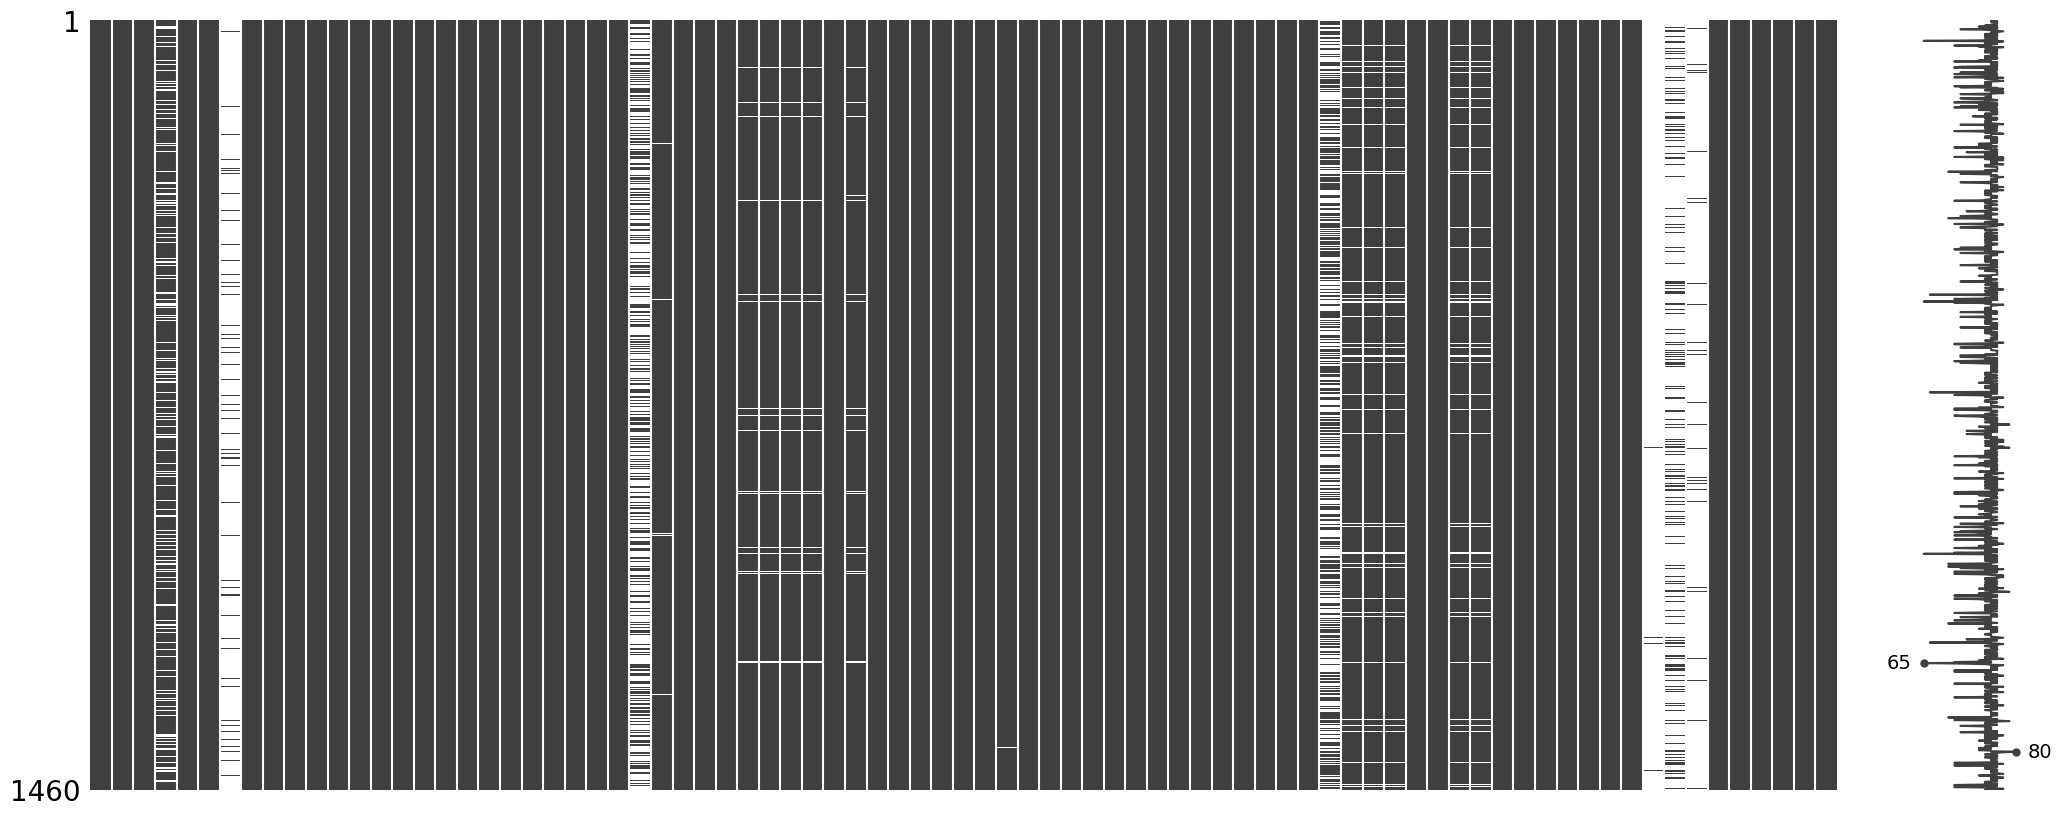

In [8]:
import missingno as msno
msno.matrix(train_df)

In [9]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing_percent = (missing / len(train_df)) * 100
missing_percent.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [10]:
train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [11]:
# Fill numerical columns with median
train_df.fillna(train_df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13504\1349741192.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)


In [12]:
train_df.isnull().sum().sum()

np.int64(0)

In [13]:
train_df = pd.get_dummies(train_df)
train_df.shape  # You’ll now see many more columns

(1460, 271)

In [14]:
correlation = train_df.corr()
correlation['SalePrice'].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

<Axes: >

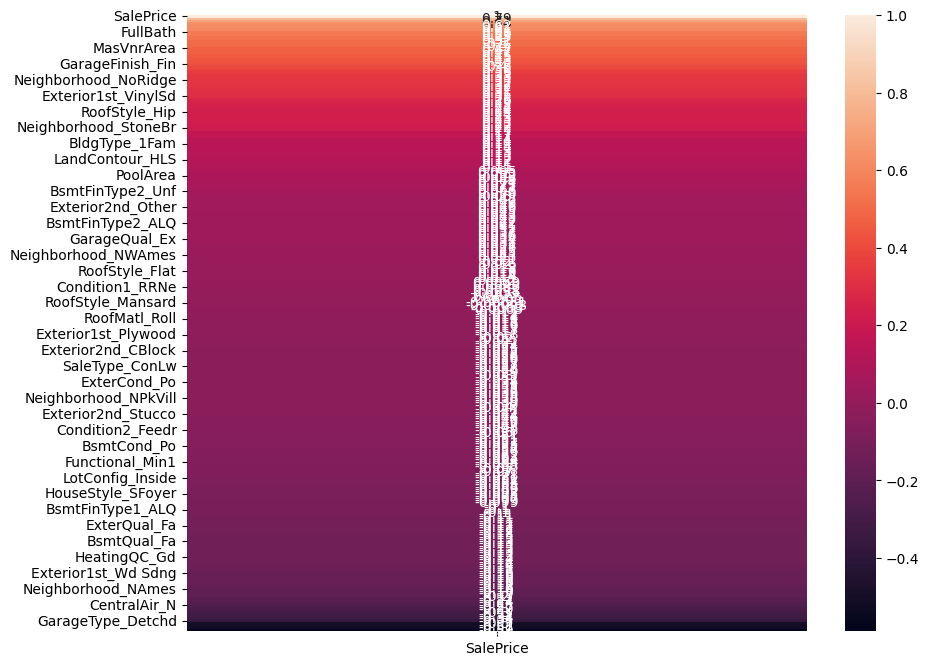

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)


In [16]:
train_df.drop('Id', axis=1, inplace=True)


In [18]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']


In [19]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing_percent = (missing / len(train_df)) * 100
missing_percent.sort_values(ascending=False)

Series([], dtype: float64)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 29602.05905870584
R² Score: 0.8857568926215903


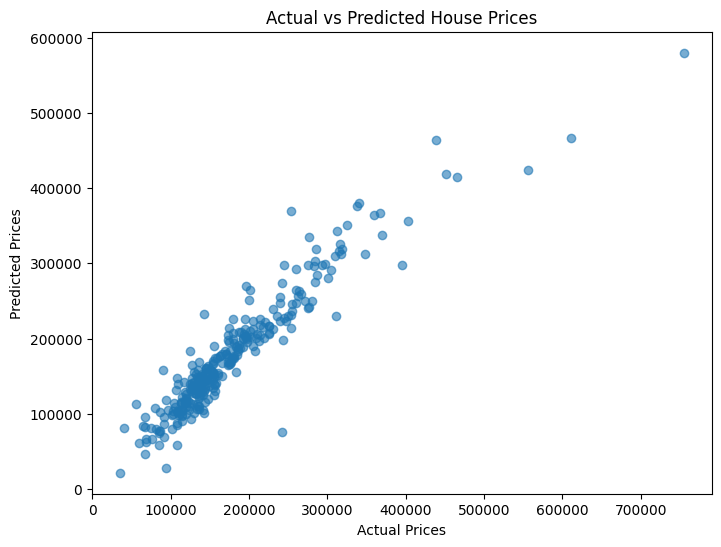

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [25]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df.sort_values(by="Coefficient", ascending=False).head(10)


,Coefficient
RoofMatl_Metal,132916.119112
GarageQual_Ex,127761.428263
RoofMatl_WdShngl,98123.616029
RoofMatl_Tar&Grv,90640.805725
RoofMatl_WdShake,88266.990255
RoofMatl_CompShg,87488.490020
RoofMatl_Roll,85978.562247
Condition2_PosA,80628.483214
RoofStyle_Shed,56293.452205
Condition2_Feedr,48854.690873


In [26]:
test_df = pd.read_csv('../data/test.csv')  # adjust path as needed
test_df.shape
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
# Drop same cols as in training
test_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# Fill numerical missing values with median
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

# Fill categorical missing values with mode
cat_cols_test = test_df.select_dtypes(include='object').columns
for col in cat_cols_test:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13504\1313243346.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)


In [28]:
test_df = pd.get_dummies(test_df)


In [29]:
# Add missing columns in test to match training set
test_df = test_df.reindex(columns=X.columns, fill_value=0)


In [30]:
test_preds = model.predict(test_df)


In [32]:
submission = pd.DataFrame({
    'Id': pd.read_csv('../data/test.csv')['Id'],  # use original test IDs
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)
